In [171]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

import cv2
import matplotlib.pylab as plt

In [140]:
m = loadmat('./starved-bb/starved-bb-track.mat', squeeze_me=True, struct_as_record=False)
data = vars(m['trk'])['data'][:, :, [0, 1]]
data = [ i for i in data]
d1 = data[0]
d1.shape

(6700, 2)

In [47]:
pnt = np.loadtxt('./coordinates.txt').astype(int)
pnt

array([[310,  14],
       [315, 211],
       [315, 378],
       [312, 459]])

C:\Users\spillern\AppData\Local\Temp\ipykernel_7292\2825481348.py:46: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, cols] = df.loc[:, cols].astype(int)


,fly,left,right,left/right,dropped_frames
0,1,3276,3424,0.956776,0
1,2,4543,2155,2.108121,2
2,3,4381,2319,1.889176,0
3,4,6523,177,36.853107,0
4,5,6492,208,31.211538,0


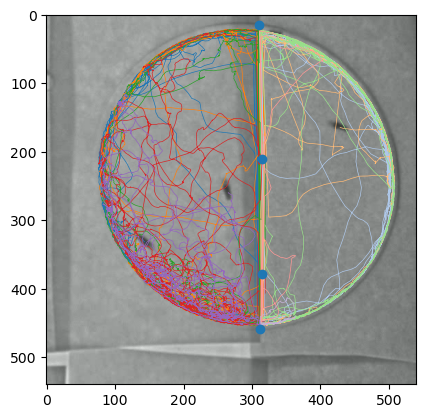

In [184]:
img = cv2.imread('./frame.png')
fig, ax = plt.subplots()
ax.imshow(img)
ax.scatter(pnt[:,0], pnt[:,1], zorder=99)

cmap = plt.cm.tab20.colors

line = dict()
for p1, p2 in zip(pnt, pnt[1:]):
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    d = np.max([dx, dy])

    x = np.linspace(p1[0], p2[0], d + 1).astype(int)
    y = np.linspace(p1[1], p2[1], d + 1).astype(int)

    ax.scatter(x, y, marker='.')

    line = {**line, **{ j: i for i, j in zip(x, y)}}

df = pd.DataFrame()
for i, d in enumerate(data):

    fnan = np.isnan(d).any(axis=1)

    d = d[~fnan]

    x = d[:, 0]
    y = d[:, 1]

    bl = np.array([line[int(j)] >= i for i, j in zip(x, y)])
    br = np.array([line[int(j)] < i for i, j in zip(x, y)])


    df.loc[i, 'fly'] = i + 1
    df.loc[i, 'left'] = bl.sum()
    df.loc[i, 'right'] = br.sum()
    df.loc[i, 'left/right'] = bl.sum() / br.sum()
    df.loc[i, 'dropped_frames'] = fnan.sum()

    ax.plot(x[br], y[br], lw=0.5, c=cmap[2*i + 1])
    ax.plot(x[bl], y[bl], lw=0.5, c=cmap[2*i])


cols = ['fly', 'left', 'right', 'dropped_frames']
df.loc[:, cols] = df.loc[:, cols].astype(int)
df

In [173]:
br.sum()

208